# Housing Price Simulation.

A notebook by *List your names here*.

Then, add alternating code cells and description/markdown cells,
between this top cell and the final "Running DocTest tests" section,
to answer all the elements of the final project programming assignment.

The answer to each part must be clearly identified with,
the text "Step 1" for Step 1, "Step 2" for Step 2, etc.
As noted in the assignment, you may do some of the work in copies of this project
for different sub-experiments,
rather than just putting it all in this notebook,
if you like.

In [45]:
import numpy as np
import doctest
import matplotlib.pyplot as plt
import pandas as pd

## Data Generation

Income: [  80.05490778   80.06374134   80.10256174 ... 4347.84052999 6847.91304905
 9273.91765711]
Housing Distance: [5.88650038e-05 8.01856975e-05 9.00192972e-05 ... 5.66290933e-01
 5.94458671e-01 6.50297156e-01]


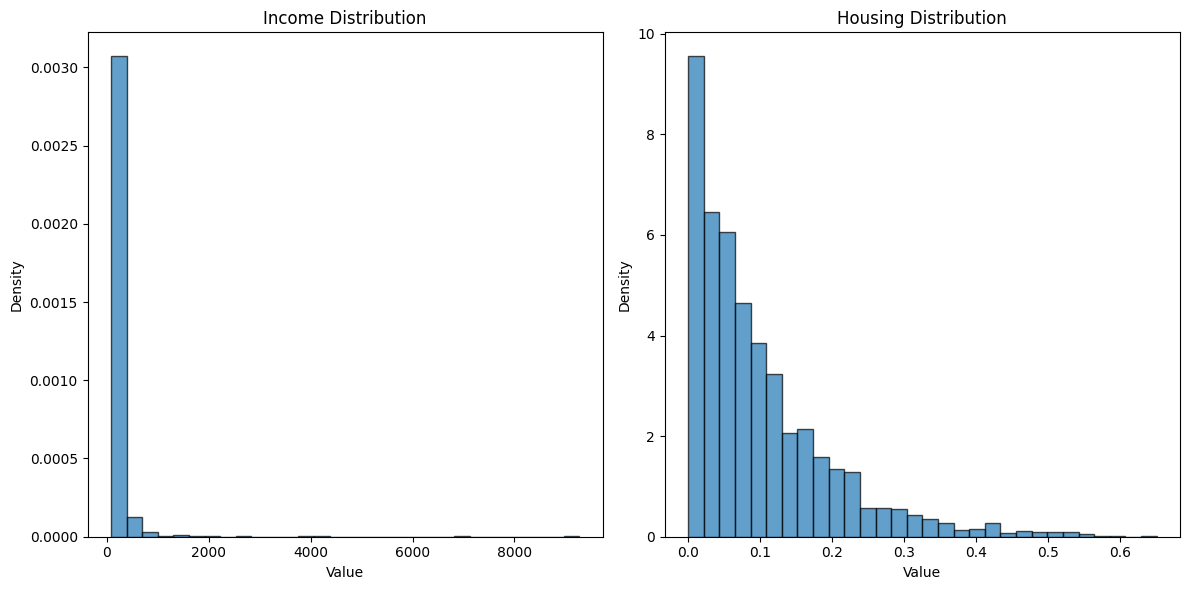

Income: [  80.03506501   80.08377124   80.0954978  ... 3261.03163564 3477.32217224
 5608.07441829]
Housing Distance: [9.16866967e-03 2.47540681e-02 4.22384079e-02 ... 1.55161763e+02
 1.97567591e+02 2.35030792e+02]


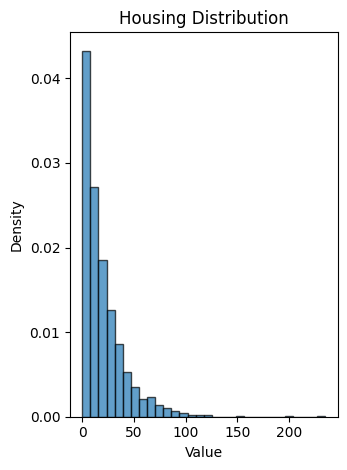

In [58]:
def gen_data(n, y_min, alpha, mu, c, seed=1):

  # Validate parameters
    if y_min <= c:
        raise ValueError
    if alpha <= 1:
        raise ValueError
    if mu <= 0:
        raise ValueError

    U = np.random.uniform(size=n)
    y = y_min * (1 - U) ** (-1.0 / alpha)

    U_exp = np.random.uniform(size=n)
    d = -mu * np.log(U_exp)

    y = np.sort(y)
    d = np.sort(d)
    return y, d


# Generate samples for visualization
n = 2000
y_min = 80
alpha = 1.75
mu = 1/10
c = 50
seed = 1

y_samples, d_samples = gen_data(n, y_min, alpha, mu, c, 1)
print(f'Income: {y_samples}')
print(f'Housing Distance: {d_samples}')

# PLOT DISTRIBUTIONS

plt.figure(figsize=(12, 6))

# INCOME
plt.subplot(1, 2, 1)
plt.hist(y_samples, bins=30, density=True, alpha=0.7, edgecolor="black")
plt.title("Income Distribution")
plt.xlabel("Value")
plt.ylabel("Density")


# HOUSING
plt.subplot(1, 2, 2)
plt.hist(d_samples, bins=30, density=True, alpha=0.7, edgecolor="black")
plt.title("Housing Distribution")
plt.xlabel("Value")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

n = 2000
y_min = 80
alpha = 1.75
mu = 20
c = 10
seed = 1

y_samples, d_samples = gen_data(n, y_min, alpha, mu, c, 1)
print(f'Income: {y_samples}')
print(f'Housing Distance: {d_samples}')


# HOUSING
plt.subplot(1, 2, 2)
plt.hist(d_samples, bins=30, density=True, alpha=0.7, edgecolor="black")
plt.title("Housing Distribution")
plt.xlabel("Value")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


## Visualization and Statistics

In [47]:
def compute_statistics(prices):
    average = np.mean(prices)
    median = np.median(prices)
    Q1 = np.percentile(prices, 25)
    Q3 = np.percentile(prices, 75)
    IQR = Q3 - Q1

    statistics = {
        'average': average,
        'median': median,
        'Q1' : Q1,
        'Q3' : Q3,
        'IQR': IQR
    }

    return statistics


def plot_house_prices(y, prices):
    n = len(y)
    income_quantiles = np.linspace(0, 1, n)

    plt.figure(figsize=(12, 6))
    plt.scatter(income_quantiles, prices, s=10, alpha=0.5, color='b')
    plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
    plt.ylabel('House Price')
    plt.title('House Prices vs. Income Quantile')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_percentage_income_spent(y, prices):
    n = len(y)
    income_quantiles = np.linspace(0, 1, n)
    with np.errstate(divide='ignore', invalid='ignore'):
        percentage_spent = np.where(y != 0, (prices / y) * 100, 0)

    plt.figure(figsize=(10, 6))
    plt.plot(income_quantiles, percentage_spent, marker='s', linestyle='--', color='r')
    plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
    plt.ylabel('Percentage of Income Spent on Housing (%)')
    plt.title('Percentage of Income Spent on Housing vs. Income Quantile')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#plot_house_prices(y, prices)
#plot_percentage_income_spent(y, prices)
#print(compute_statistics(prices))

## 2a

In [48]:
def equilibrium_price_recursive(n, c, y, d, j):

    if j < 0 or j >= n:
        raise ValueError(f"Invalid j: {j}. It should be between 0 and {n-1}.")

    if j == 0:
        return c  # Base case: first house price is equal to c

    theta_j = np.exp(-(d[j] - d[j - 1]))
    # Recursive call for the previous house (j-1)
    previous_price = equilibrium_price_recursive(n, c, y, d, j - 1)
    equilibrium_price = theta_j * previous_price + (1 - theta_j) * y[j]
    return equilibrium_price

def calc_all_prices(n, c, y, d):
    prices = []
    for j in range(n):
        prices.append(equilibrium_price_recursive(n, c, y, d, j))
    return np.array(prices)


In [49]:
def calc_prices_iterative(n, c, y, d):
    prices = np.zeros(n)
    prices[0] = c  # Base case
    
    # Calculate prices iteratively
    for j in range(1, n):
        theta_j = np.exp(-(d[j] - d[j-1]))
        prices[j] = theta_j * prices[j-1] + (1 - theta_j) * y[j]
    
    return prices


## 4a

### i, ii, iii

   y_min     average      median          Q1          Q3         IQR
0     80  175.958681  111.784772   87.959052  163.494918   75.535866
1    100  211.427775  137.751265  107.434945  211.653459  104.218514
2    150  307.324592  208.524695  164.631542  310.032088  145.400546
   y_min     average      median          Q1          Q3         IQR
0     80  175.958681  111.784772   87.959052  163.494918   75.535866
1    100  211.427775  137.751265  107.434945  211.653459  104.218514
2    150  307.324592  208.524695  164.631542  310.032088  145.400546


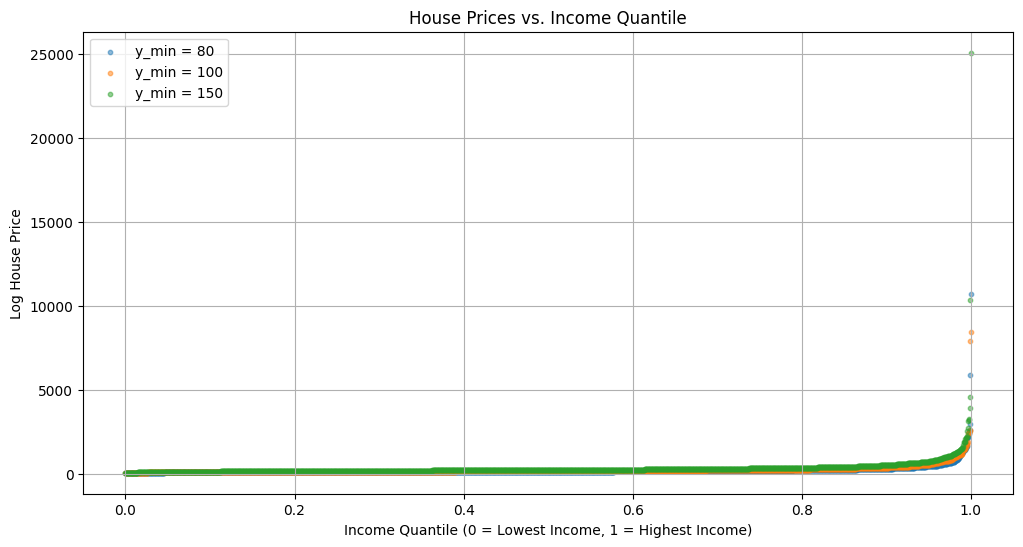

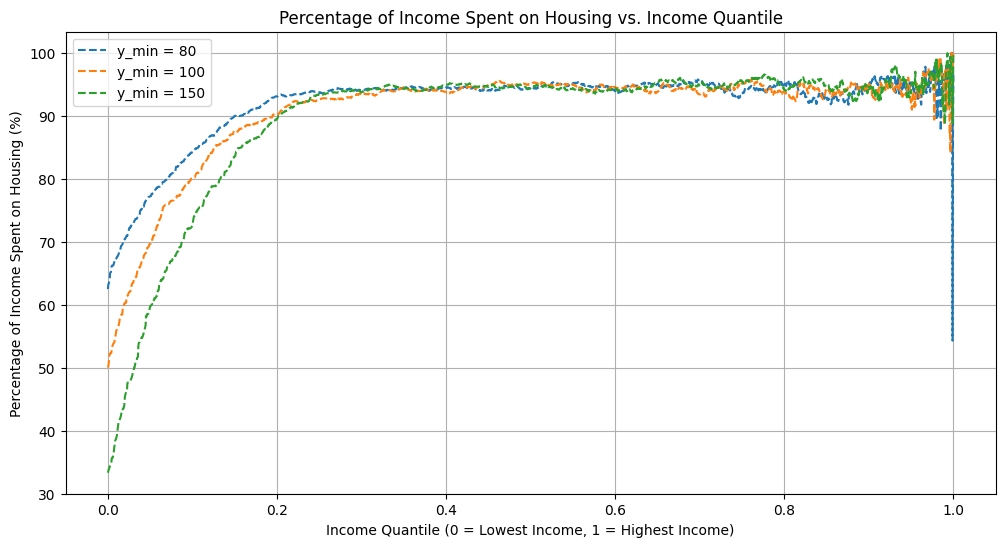

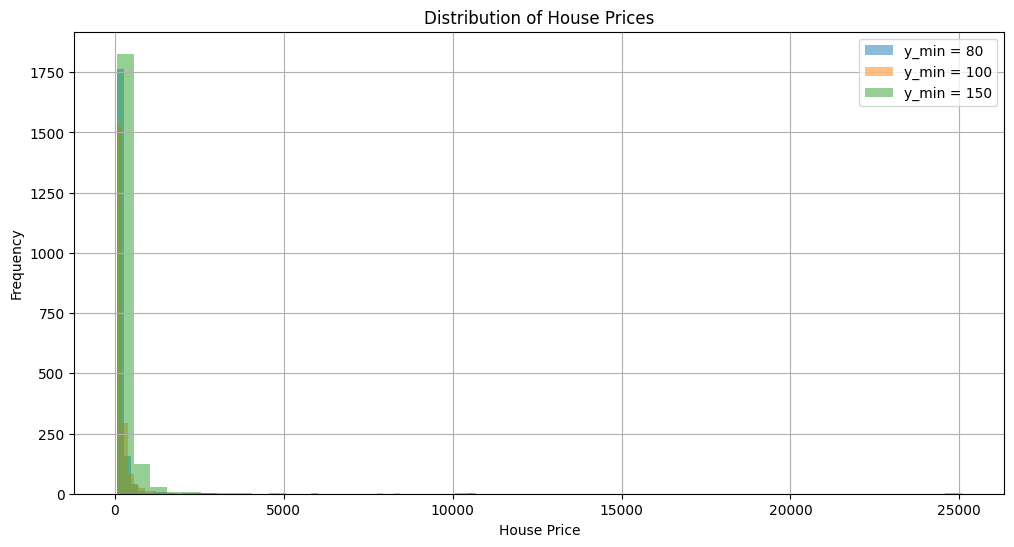

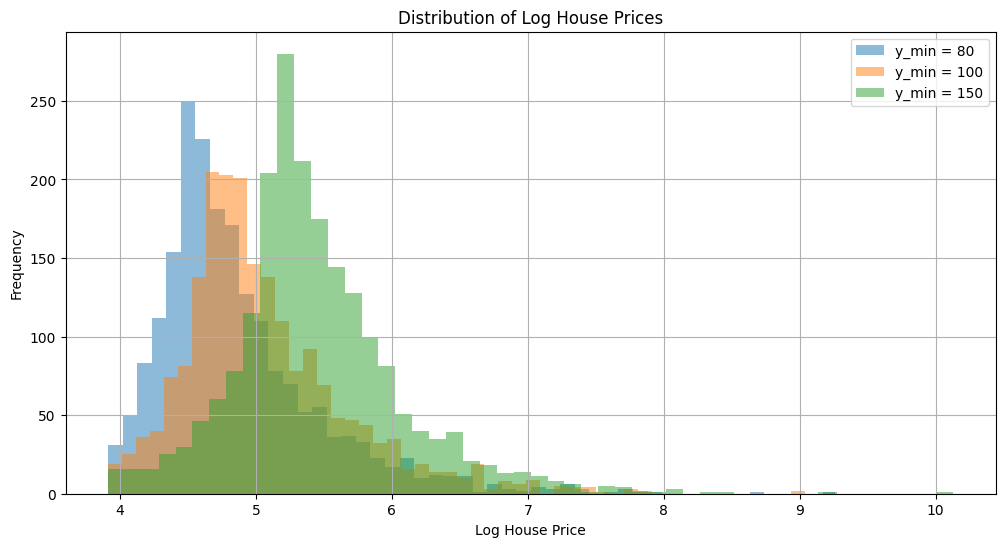

In [50]:
n = 2000
y_min_list = [80, 100, 150]
alpha = 1.75
mu = 10
c = 50
seed = 1
# Initialize lists to collect statistics and data
stats_list = []
stats_list_i = []
all_y = []  # Store income data
all_y_i = []
all_i_prices = []
all_prices = []  # Store price data

# Iterate over each y_min value
for y_min in y_min_list:
    # Generate data
    y, d = gen_data(n, y_min, alpha, mu, c)
    
    # Calculate equilibrium prices
    prices_recursive = calc_all_prices(n, c, y, d)
   
    
    # Store the data
    all_y.append(y)
    all_prices.append(prices_recursive)
    
    # Compute statistics
    stats = compute_statistics(prices_recursive)
    stats['y_min'] = y_min  
    stats_list.append(stats)
    
    prices_iterative = calc_prices_iterative(n, c, y, d)
    all_y_i.append(y)
    all_i_prices.append(prices_iterative)
    
    # Compute statistics
    stats_i = compute_statistics(prices_iterative)
    stats_i['y_min'] = y_min  
    stats_list_i.append(stats)

    # Test base case
   # base_case_price = prices[0]  # This is the price of house j=1
   # if base_case_price == c:
   #     base_case_result = f"Base Case check passed: {base_case_price}"
  #  else:
   #     base_case_result = f"Base Case check failed: {base_case_price}"

stats_df = pd.DataFrame(stats_list)
stats_df = stats_df[['y_min', 'average', 'median', 'Q1', 'Q3', 'IQR']]
print(stats_df)

stats_i_df = pd.DataFrame(stats_list_i)
stats_i_df = stats_i_df[['y_min', 'average', 'median', 'Q1', 'Q3', 'IQR']]
print(stats_i_df)

# Create plots after the loop
income_quantiles = np.linspace(0, 1, n)

# First plot: House Prices vs Income Quantile
plt.figure(figsize=(12, 6))
for i, (prices, y_min) in enumerate(zip(all_prices, y_min_list)):
    plt.scatter(income_quantiles, prices, s=10, alpha=0.5, label=f'y_min = {y_min}')

plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('Log House Price')
plt.title('House Prices vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()

# Second plot: Percentage of Income Spent
plt.figure(figsize=(12, 6))
for i, (y, prices, y_min) in enumerate(zip(all_y, all_prices, y_min_list)):
    percentage_spent = np.where(y != 0, (prices / y) * 100, 0)
    plt.plot(income_quantiles, percentage_spent, linestyle='--', label=f'y_min = {y_min}')

plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('Percentage of Income Spent on Housing (%)')
plt.title('Percentage of Income Spent on Housing vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
for i, (prices, y_min) in enumerate(zip(all_prices, y_min_list)):
    plt.hist(prices, bins=50, alpha=0.5, label=f'y_min = {y_min}')

plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
for i, (prices, y_min) in enumerate(zip(all_prices, y_min_list)):
    plt.hist(np.log(prices), bins=50, alpha=0.5, label=f'y_min = {y_min}')

plt.xlabel('Log House Price')
plt.ylabel('Frequency')
plt.title('Distribution of Log House Prices')
plt.grid(True)
plt.legend()
plt.show()



   alpha     average      median         Q1          Q3         IQR
0   1.25  449.578704  128.820242  92.023000  226.934806  134.911806
1   1.75  172.115452  112.623791  88.347157  167.158634   78.811477
2   3.00  114.088031   97.404257  83.419014  122.081107   38.662093
   alpha     average      median         Q1          Q3         IQR
0   1.25  449.578704  128.820242  92.023000  226.934806  134.911806
1   1.75  172.115452  112.623791  88.347157  167.158634   78.811477
2   3.00  114.088031   97.404257  83.419014  122.081107   38.662093


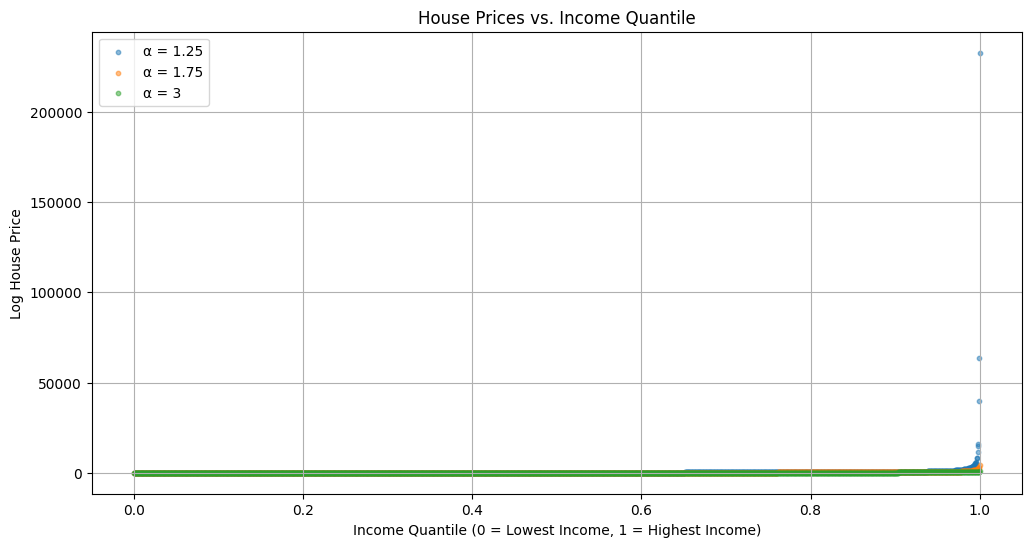

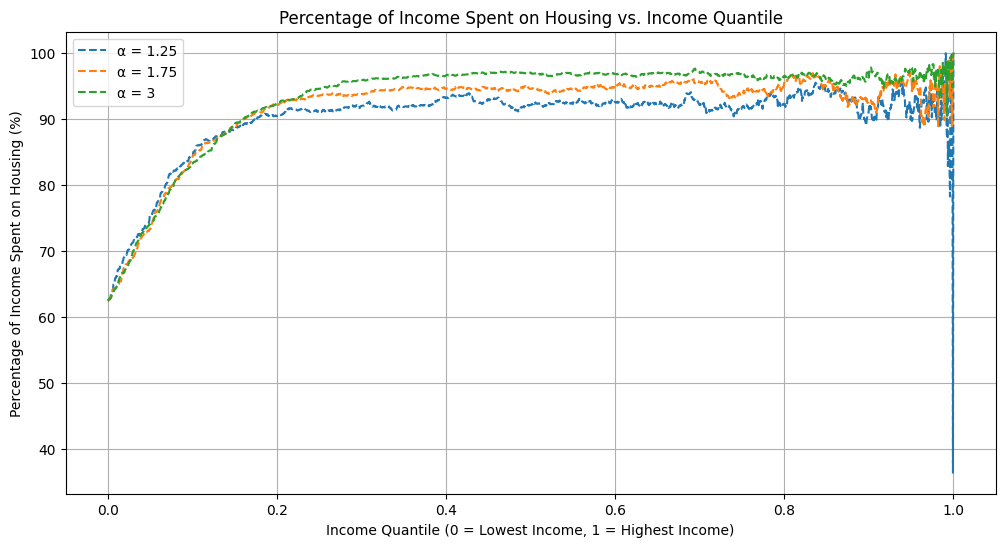

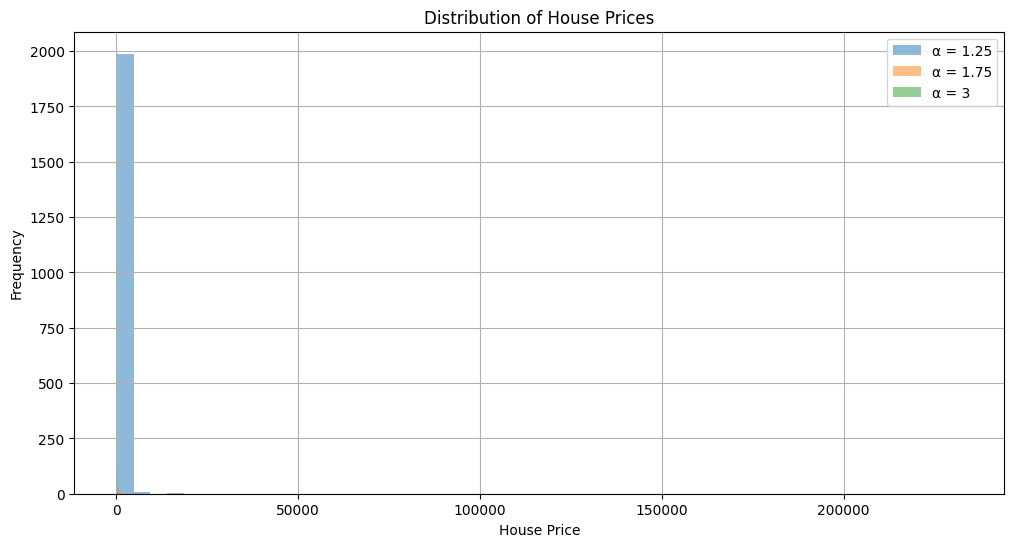

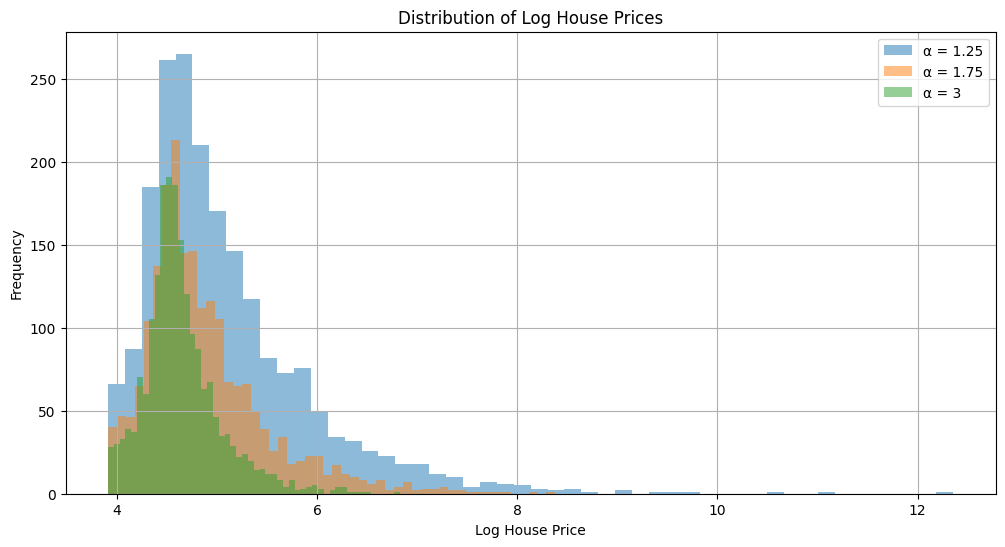

In [51]:
n = 2000
alpha_list = [1.25, 1.75, 3]
y_min = 80
mu = 10
c = 50
seed = 1

# Initialize lists to collect statistics and data
stats_list = []
stats_list_i = []
all_y = []  # Store income data
all_y_i = []
all_i_prices = []
all_prices = []  # Store price data

# Iterate over each alpha value
for alpha in alpha_list:
    # Generate data
    y, d = gen_data(n, y_min, alpha, mu, c)
    
    # Calculate equilibrium prices
    prices_recursive = calc_all_prices(n, c, y, d)
    
    # Store the data
    all_y.append(y)
    all_prices.append(prices_recursive)
    
    # Compute statistics
    stats = compute_statistics(prices_recursive)
    stats['alpha'] = alpha  
    stats_list.append(stats)
    
    prices_iterative = calc_prices_iterative(n, c, y, d)
    all_y_i.append(y)
    all_i_prices.append(prices_iterative)
    
    # Compute statistics
    stats_i = compute_statistics(prices_iterative)
    stats_i['alpha'] = alpha  
    stats_list_i.append(stats_i)  # Fixed: was appending stats instead of stats_i

# Create DataFrames and select columns
stats_df = pd.DataFrame(stats_list)
stats_df = stats_df[['alpha', 'average', 'median', 'Q1', 'Q3', 'IQR']]  # Fixed: Use list for column selection
print(stats_df)

stats_i_df = pd.DataFrame(stats_list_i)
stats_i_df = stats_i_df[['alpha', 'average', 'median', 'Q1', 'Q3', 'IQR']]
print(stats_i_df)

# Create plots after the loop
income_quantiles = np.linspace(0, 1, n)

# First plot: House Prices vs Income Quantile
plt.figure(figsize=(12, 6))
for i, (prices, alpha) in enumerate(zip(all_prices, alpha_list)):
    plt.scatter(income_quantiles, prices, s=10, alpha=0.5, label=f'α = {alpha}')  # Fixed: Label shows alpha instead of y_min
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('Log House Price')
plt.title('House Prices vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()

# Second plot: Percentage of Income Spent
plt.figure(figsize=(12, 6))
for i, (y, prices, alpha) in enumerate(zip(all_y, all_prices, alpha_list)):
    percentage_spent = np.where(y != 0, (prices / y) * 100, 0)
    plt.plot(income_quantiles, percentage_spent, linestyle='--', label=f'α = {alpha}')  # Fixed: Label shows alpha
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('Percentage of Income Spent on Housing (%)')
plt.title('Percentage of Income Spent on Housing vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()

# Third plot: Distribution of House Prices
plt.figure(figsize=(12, 6))
for i, (prices, alpha) in enumerate(zip(all_prices, alpha_list)):
    plt.hist(prices, bins=50, alpha=0.5, label=f'α = {alpha}')  # Fixed: Label shows alpha
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.grid(True)
plt.legend()
plt.show()

# Fourth plot: Distribution of Log House Prices
plt.figure(figsize=(12, 6))
for i, (prices, alpha) in enumerate(zip(all_prices, alpha_list)):
    plt.hist(np.log(prices), bins=50, alpha=0.5, label=f'α = {alpha}')  # Fixed: Label shows alpha
plt.xlabel('Log House Price')
plt.ylabel('Frequency')
plt.title('Distribution of Log House Prices')
plt.grid(True)
plt.legend()
plt.show()

   mu     average      median         Q1          Q3        IQR
0   5  161.263735  103.101486  78.652617  153.603384  74.950768
1  10  167.936575  109.917980  87.393557  162.599102  75.205545
2  20  174.217306  118.486225  92.388027  169.694854  77.306827
   mu     average      median         Q1          Q3        IQR
0   5  161.263735  103.101486  78.652617  153.603384  74.950768
1  10  167.936575  109.917980  87.393557  162.599102  75.205545
2  20  174.217306  118.486225  92.388027  169.694854  77.306827


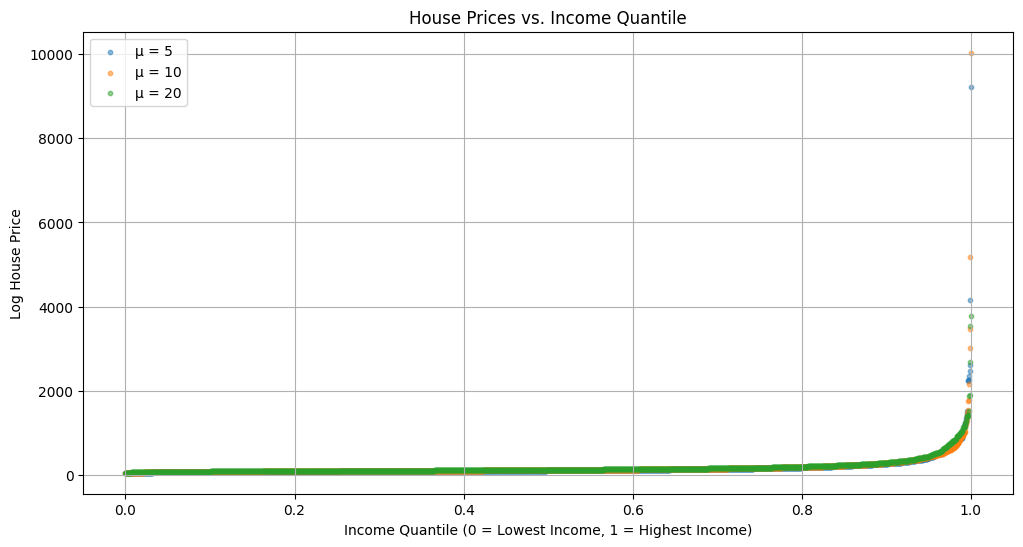

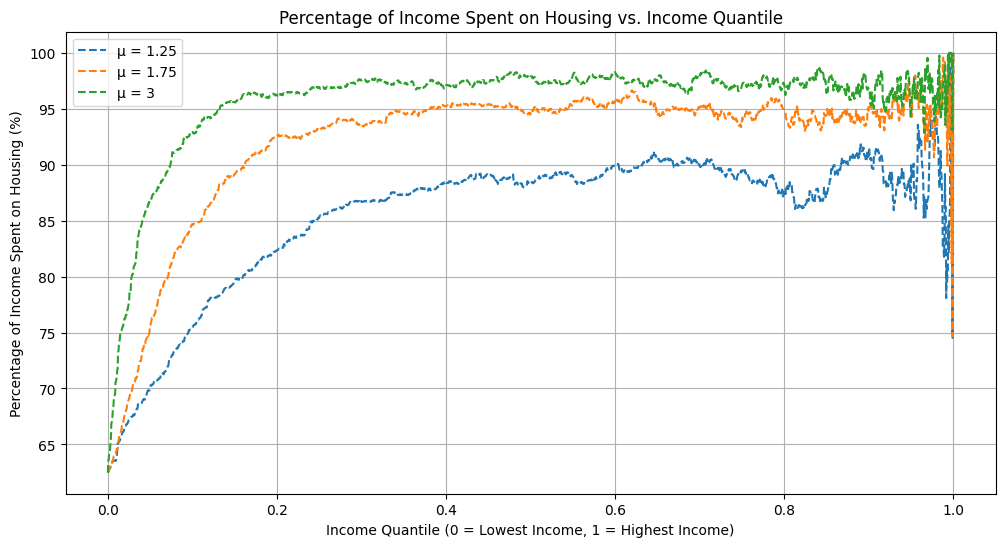

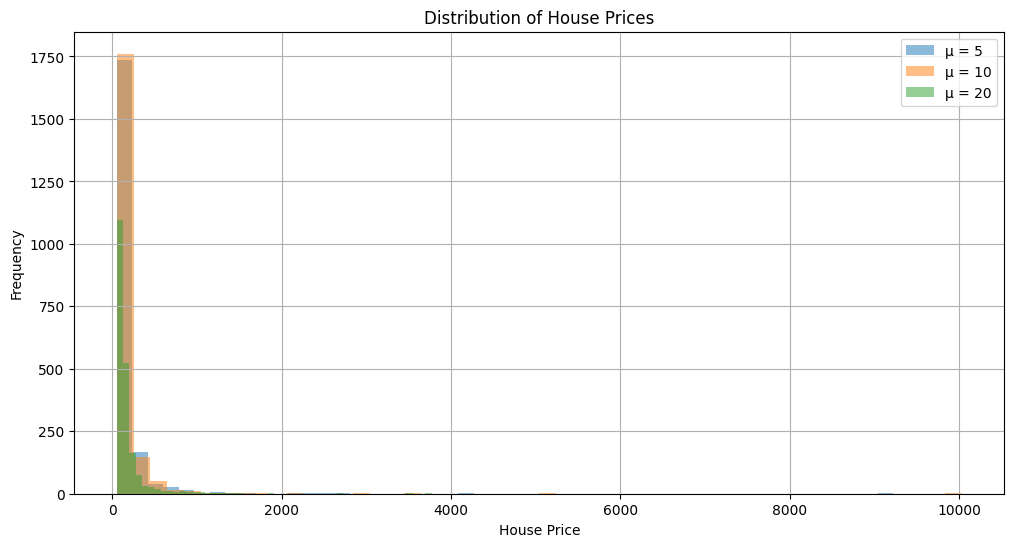

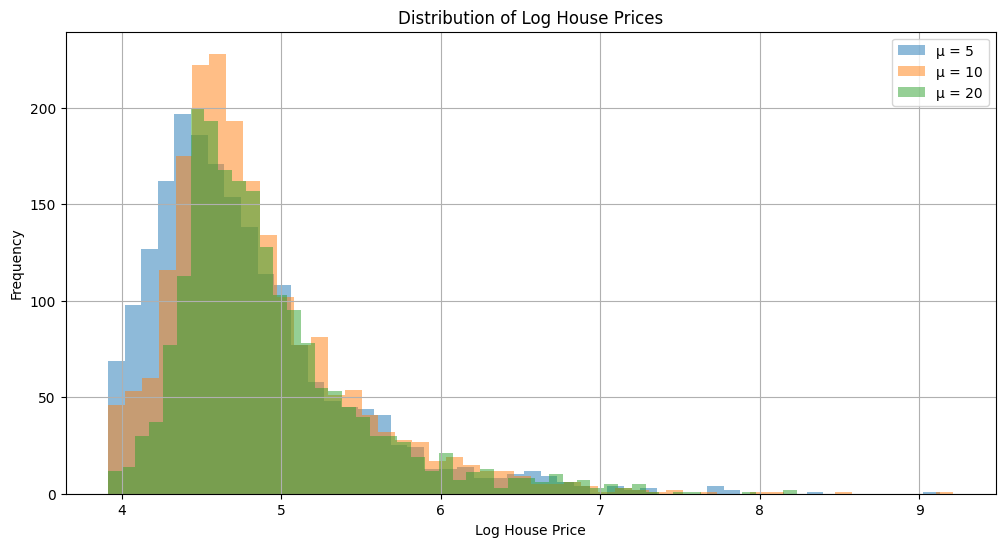

In [60]:
n = 2000
mu_list = [5,10,20]
y_min = 80
alpha = 1.75
c = 50
seed = 1

# Initialize lists to collect statistics and data
stats_list = []
stats_list_i = []
all_y = []  # Store income data
all_y_i = []
all_i_prices = []
all_prices = []  # Store price data

# Iterate over each alpha value
for mu in mu_list:
    # Generate data
    y, d = gen_data(n, y_min, alpha, mu, c)
    
    # Calculate equilibrium prices
    prices_recursive = calc_all_prices(n, c, y, d)
    
    # Store the data
    all_y.append(y)
    all_prices.append(prices_recursive)
    
    # Compute statistics
    stats = compute_statistics(prices_recursive)
    stats['mu'] = mu  
    stats_list.append(stats)
    
    prices_iterative = calc_prices_iterative(n, c, y, d)
    all_y_i.append(y)
    all_i_prices.append(prices_iterative)
    
    # Compute statistics
    stats_i = compute_statistics(prices_iterative)
    stats_i['mu'] = mu  
    stats_list_i.append(stats_i)  # Fixed: was appending stats instead of stats_i

# Create DataFrames and select columns
stats_df = pd.DataFrame(stats_list)
stats_df = stats_df[['mu', 'average', 'median', 'Q1', 'Q3', 'IQR']]  # Fixed: Use list for column selection
print(stats_df)

stats_i_df = pd.DataFrame(stats_list_i)
stats_i_df = stats_i_df[['mu', 'average', 'median', 'Q1', 'Q3', 'IQR']]
print(stats_i_df)

# Create plots after the loop
income_quantiles = np.linspace(0, 1, n)

# First plot: House Prices vs Income Quantile
plt.figure(figsize=(12, 6))
for i, (prices, mu) in enumerate(zip(all_prices, mu_list)):
    plt.scatter(income_quantiles, prices, s=10, alpha=0.5, label=f'μ = {mu}')  # Fixed: Label shows alpha instead of y_min
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('Log House Price')
plt.title('House Prices vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()

# Second plot: Percentage of Income Spent
plt.figure(figsize=(12, 6))
for i, (y, prices, mu) in enumerate(zip(all_y, all_prices, alpha_list)):
    percentage_spent = np.where(y != 0, (prices / y) * 100, 0)
    plt.plot(income_quantiles, percentage_spent, linestyle='--', label=f'μ = {mu}')  # Fixed: Label shows alpha
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('Percentage of Income Spent on Housing (%)')
plt.title('Percentage of Income Spent on Housing vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()

# Third plot: Distribution of House Prices
plt.figure(figsize=(12, 6))
for i, (prices, mu) in enumerate(zip(all_prices, mu_list)):
    plt.hist(prices, bins=50, alpha=0.5, label=f'μ = {mu}')  # Fixed: Label shows alpha
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.grid(True)
plt.legend()
plt.show()

# Fourth plot: Distribution of Log House Prices
plt.figure(figsize=(12, 6))
for i, (prices, mu) in enumerate(zip(all_prices, mu_list)):
    plt.hist(np.log(prices), bins=50, alpha=0.5, label=f'μ = {mu}')  # Fixed: Label shows alpha
plt.xlabel('Log House Price')
plt.ylabel('Frequency')
plt.title('Distribution of Log House Prices')
plt.grid(True)
plt.legend()
plt.show()

## 2b

In [53]:
def equilibrium_price_memoized(n, c, y, d, j, memo=None):
    # Initialize memo array if not provided
    if memo is None:
        memo = np.full(n, np.nan)
    
    # Check if value is out of bounds
    if j < 0 or j >= n:
        raise ValueError(f"Invalid j: {j}. It should be between 0 and {n-1}.")
    
    # Check if value has been memoized
    if not np.isnan(memo[j]):
        return memo[j]
    
    # Base case: first house
    if j == 0:
        memo[j] = c
        return memo[j]
    
    # Calculate theta_j
    theta_j = np.exp(-(d[j] - d[j - 1]))
    
    # Recursive call for previous house with memoization
    previous_price = equilibrium_price_memoized(n, c, y, d, j - 1, memo)
    
    # Calculate and memoize the equilibrium price
    memo[j] = theta_j * previous_price + (1 - theta_j) * y[j]
    return memo[j]

def calc_all_prices_memoized(n, c, y, d):
    memo = np.full(n, np.nan)
    prices = []
    for j in range(n):
        prices.append(equilibrium_price_memoized(n, c, y, d, j, memo))
    return np.array(prices)


## Running DocTest tests

This last step gets the DocTest system to check test cases in the documentation comments.
In this course, you won't need to modify the stuff below, or even understand the details.

In [54]:
import doctest
result = doctest.testmod(verbose=False)
if result[0] == 0:
    print(("Congratulations! You have passed all "+str(result[1])+" tests"))
else:
    print("Rats!")

Congratulations! You have passed all 0 tests
